# Lab 8: Digits Data Logistic Regression


## Brief Overview

The task of this notebook is to classify handwriten digits data.

Explanation of the digit dataset is in `digits.DESCR` below.


The brief explanation of this task is to classify 10 class of 64 length vector input, originally 8 by 8 grayscale(0~16) handwriten digits images.

In this task, I use logistic regression model.

Other information like number of instance is also in `digits.DESCR` below.

## Exploratory Data Analysis

In exploratory data analysis, I will show 

- official description
- data type
- data shape
- first 5 images

In [7]:
# load digit data
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
# print description
print(digits.DESCR.split("References")[0])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [8]:
# data type and shape information
print("Data type:",type(digits))
print("items of digits", dir(digits))
print("Shape of data:", digits.data.shape)
print("Shape of label:", digits.target.shape)


Data type: <class 'sklearn.utils.Bunch'>
items of digits ['DESCR', 'data', 'images', 'target', 'target_names']
Shape of data: (1797, 64)
Shape of label: (1797,)


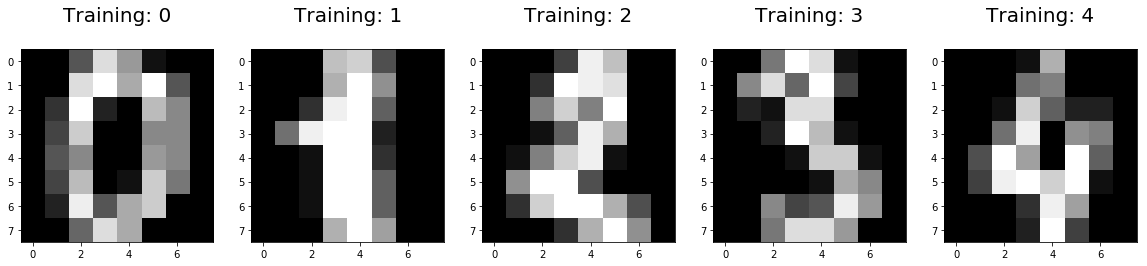

In [9]:
# first 5 images
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize=20)
    


## Digits Logistic Regression

First, I set `LogisticRegression()` and fit with training dataset and predict test datasets.

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# train test split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# fit model and predict test data
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Then, calcurate confusion matrix and misclassification rate as a evaluation criteria.

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

misclassification_rate = 1 - np.sum(np.diag(cm)) / np.sum(cm)
print("misclassification rate:", misclassification_rate)

misclassification rate: 0.0466666666667


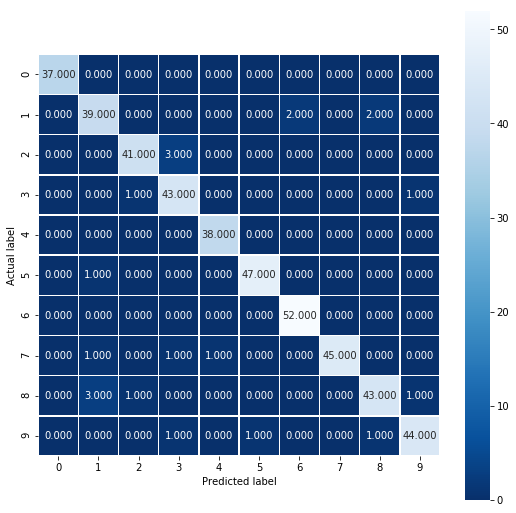

In [13]:
import seaborn as sns

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(1 - misclassification_rate)
plt.show()


## Conclusion

In this notebook, I could learn basic usage of logistic regression model with sklearn.

The result of the model seem enough to use because of small misclassification rate.
One small thought is, this classifier tend to misclassify actual 2 as 3, and actual 8 as 1 from confusion matrix visualization.